In [1]:
import pandas as pd
import numpy as np
import wrangle
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56080 entries, 0 to 56079
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            56080 non-null  int64  
 1   parcelid                      56080 non-null  int64  
 2   logerror                      56080 non-null  float64
 3   transactiondate               56080 non-null  object 
 4   airconditioningtypeid         13651 non-null  float64
 5   airconditioningdesc           13651 non-null  object 
 6   architecturalstyletypeid      61 non-null     float64
 7   architecturalstyledesc        61 non-null     object 
 8   basementsqft                  43 non-null     float64
 9   bathroomcnt                   56080 non-null  float64
 10  bedroomcnt                    56080 non-null  float64
 11  buildingclasstypeid           0 non-null      object 
 12  buildingclassdesc             0 non-null      object 
 13  b

In [4]:
df = wrangle.handle_missing_values(df, prop_required_columns=0.5, prop_required_row=0.75)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55850 entries, 4 to 56079
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            55850 non-null  int64  
 1   parcelid                      55850 non-null  int64  
 2   logerror                      55850 non-null  float64
 3   transactiondate               55850 non-null  object 
 4   bathroomcnt                   55850 non-null  float64
 5   bedroomcnt                    55850 non-null  float64
 6   buildingqualitytypeid         36989 non-null  float64
 7   calculatedbathnbr             55691 non-null  float64
 8   calculatedfinishedsquarefeet  55840 non-null  float64
 9   finishedsquarefeet12          55656 non-null  float64
 10  fips                          55850 non-null  float64
 11  fullbathcnt                   55691 non-null  float64
 12  heatingorsystemtypeid         37076 non-null  float64
 13  h

In [6]:
df.heatingorsystemdesc = df.heatingorsystemdesc.fillna('Central')

In [7]:
df.heatingorsystemtypeid = df.heatingorsystemtypeid.fillna(2.0)

In [8]:
df.heatingorsystemtypeid.value_counts()

2.0     40528
7.0     14739
6.0       499
20.0       68
13.0       11
18.0        4
1.0         1
Name: heatingorsystemtypeid, dtype: int64

In [9]:
df.buildingqualitytypeid.value_counts()

6.0     11971
4.0      9436
8.0      8634
7.0      3181
5.0      1733
9.0      1015
11.0      487
10.0      238
3.0       188
12.0       86
1.0        14
2.0         6
Name: buildingqualitytypeid, dtype: int64

In [10]:
df.propertyzoningdesc.value_counts()

LAR1       7120
LARS       1570
LBR1N      1174
LARA        737
SCUR2       709
           ... 
LCA 22*       1
SFC2*         1
LAP           1
LCC3YY        1
CCR4-1        1
Name: propertyzoningdesc, Length: 1385, dtype: int64

In [11]:
df = df.drop(columns=['propertyzoningdesc', 'buildingqualitytypeid'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55850 entries, 4 to 56079
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            55850 non-null  int64  
 1   parcelid                      55850 non-null  int64  
 2   logerror                      55850 non-null  float64
 3   transactiondate               55850 non-null  object 
 4   bathroomcnt                   55850 non-null  float64
 5   bedroomcnt                    55850 non-null  float64
 6   calculatedbathnbr             55691 non-null  float64
 7   calculatedfinishedsquarefeet  55840 non-null  float64
 8   finishedsquarefeet12          55656 non-null  float64
 9   fips                          55850 non-null  float64
 10  fullbathcnt                   55691 non-null  float64
 11  heatingorsystemtypeid         55850 non-null  float64
 12  heatingorsystemdesc           55850 non-null  object 
 13  l

In [13]:
df = df.drop(columns='unitcnt')

In [14]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54034 entries, 52 to 56079
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            54034 non-null  int64  
 1   parcelid                      54034 non-null  int64  
 2   logerror                      54034 non-null  float64
 3   transactiondate               54034 non-null  object 
 4   bathroomcnt                   54034 non-null  float64
 5   bedroomcnt                    54034 non-null  float64
 6   calculatedbathnbr             54034 non-null  float64
 7   calculatedfinishedsquarefeet  54034 non-null  float64
 8   finishedsquarefeet12          54034 non-null  float64
 9   fips                          54034 non-null  float64
 10  fullbathcnt                   54034 non-null  float64
 11  heatingorsystemtypeid         54034 non-null  float64
 12  heatingorsystemdesc           54034 non-null  object 
 13  

In [16]:
df.describe()

,id,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,regionidcity,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
count,54034.000000,5.403400e+04,54034.000000,54034.000000,54034.000000,54034.000000,54034.000000,54034.000000,54034.000000,54034.000000,...,54034.000000,54034.000000,54034.000000,54034.00000,5.403400e+04,5.403400e+04,54034.000000,5.403400e+04,54034.000000,5.403400e+04
mean,38639.101399,1.293532e+07,0.016754,2.244429,3.307714,2.244429,1859.898323,1859.898323,6048.805234,2.189862,...,35502.369249,96593.532165,1.896251,1960.79883,1.753817e+05,4.515503e+05,2015.999981,2.761686e+05,5492.379393,6.049109e+13
std,22370.443882,2.254567e+06,0.171411,0.982425,0.919488,0.982425,952.185876,952.185876,21.293892,0.962661,...,54312.735224,4343.752795,3.164631,21.56544,2.258081e+05,5.868895e+05,0.004302,4.125188e+05,6742.498664,2.114390e+11
min,337.000000,1.071174e+07,-4.655420,1.000000,0.000000,1.000000,78.000000,78.000000,6037.000000,1.000000,...,3491.000000,95982.000000,0.000000,1862.00000,1.000000e+01,9.762000e+03,2015.000000,2.250000e+03,20.240000,6.037101e+13
25%,19432.250000,1.155972e+07,-0.024414,2.000000,3.000000,2.000000,1262.000000,1262.000000,6037.000000,2.000000,...,12447.000000,96193.000000,0.000000,1949.00000,7.514150e+04,1.870200e+05,2016.000000,7.766475e+04,2516.457500,6.037312e+13
50%,38737.500000,1.257344e+07,0.006755,2.000000,3.000000,2.000000,1626.000000,1626.000000,6037.000000,2.000000,...,24832.000000,96387.000000,0.000000,1958.00000,1.227140e+05,3.270900e+05,2016.000000,1.819065e+05,4098.660000,6.037570e+13
75%,57082.750000,1.405866e+07,0.039485,3.000000,4.000000,3.000000,2199.000000,2199.000000,6059.000000,3.000000,...,44116.000000,96987.000000,5.000000,1975.00000,2.022000e+05,5.280000e+05,2016.000000,3.434372e+05,6318.302500,6.059042e+13
max,77613.000000,1.629609e+08,5.262999,20.000000,25.000000,20.000000,26345.000000,26345.000000,6111.000000,20.000000,...,396556.000000,399675.000000,86.000000,2015.00000,1.040236e+07,3.016684e+07,2016.000000,1.976448e+07,342940.380000,6.111009e+13


In [20]:
def get_counties():
    '''
    This function will create dummy variables out of the original fips column. 
    And return a dataframe with all of the original columns.
    We will keep fips column for data validation after making changes. 
    New columns added will be 'LA', 'Orange', and 'Ventura' which are boolean 
    The fips ids are renamed to be the name of the county each represents. 
    '''
    # create dummy vars of fips id
    county_df = pd.get_dummies(df.fips)
    # rename columns by actual county name
    county_df.columns = ['LA', 'Orange', 'Ventura']
    # concatenate the dataframe with the 3 county columns to the original dataframe
    df_dummies = pd.concat([df, county_df], axis = 1)
    return df_dummies

In [21]:
df = get_counties()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54034 entries, 52 to 56079
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            54034 non-null  int64  
 1   parcelid                      54034 non-null  int64  
 2   logerror                      54034 non-null  float64
 3   transactiondate               54034 non-null  object 
 4   bathroomcnt                   54034 non-null  float64
 5   bedroomcnt                    54034 non-null  float64
 6   calculatedbathnbr             54034 non-null  float64
 7   calculatedfinishedsquarefeet  54034 non-null  float64
 8   finishedsquarefeet12          54034 non-null  float64
 9   fips                          54034 non-null  float64
 10  fullbathcnt                   54034 non-null  float64
 11  heatingorsystemtypeid         54034 non-null  float64
 12  heatingorsystemdesc           54034 non-null  object 
 13  

In [24]:
print("LA County Verified: ", df[df.fips==6037]['fips'].count() == df.LA.sum())
print("Orange County Verified: ", df[df.fips==6059]['fips'].count() == df.Orange.sum())
print("Ventura County Verified: ", df[df.fips==6111]['fips'].count() == df.Ventura.sum())

LA County Verified:  True
Orange County Verified:  True
Ventura County Verified:  True


In [25]:
def create_features(df):
    df['age'] = 2017 - df.yearbuilt
    df['age_bin'] = pd.cut(df.age, 
                           bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
                           labels = [0, .066, .133, .20, .266, .333, .40, .466, .533, 
                                     .60, .666, .733, .8, .866, .933])

    # create taxrate variable
    df['taxrate'] = df.taxamount/df.taxvaluedollarcnt*100

    # create acres variable
    df['acres'] = df.lotsizesquarefeet/43560

    # bin acres
    df['acres_bin'] = pd.cut(df.acres, bins = [0, .10, .15, .25, .5, 1, 5, 10, 20, 50, 200], 
                       labels = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9])

    # square feet bin
    df['sqft_bin'] = pd.cut(df.calculatedfinishedsquarefeet, 
                            bins = [0, 800, 1000, 1250, 1500, 2000, 2500, 3000, 4000, 7000, 12000],
                            labels = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9]
                       )

    # dollar per square foot-structure
    df['structure_dollar_per_sqft'] = df.structuretaxvaluedollarcnt/df.calculatedfinishedsquarefeet


    df['structure_dollar_sqft_bin'] = pd.cut(df.structure_dollar_per_sqft, 
                                             bins = [0, 25, 50, 75, 100, 150, 200, 300, 500, 1000, 1500],
                                             labels = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9]
                                            )


    # dollar per square foot-land
    df['land_dollar_per_sqft'] = df.landtaxvaluedollarcnt/df.lotsizesquarefeet

    df['lot_dollar_sqft_bin'] = pd.cut(df.land_dollar_per_sqft, bins = [0, 1, 5, 20, 50, 100, 250, 500, 1000, 1500, 2000],
                                       labels = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9]
                                      )


    # update datatypes of binned values to be float
    df = df.astype({'sqft_bin': 'float64', 'acres_bin': 'float64', 'age_bin': 'float64',
                    'structure_dollar_sqft_bin': 'float64', 'lot_dollar_sqft_bin': 'float64'})


    # ratio of bathrooms to bedrooms
    df['bath_bed_ratio'] = df.bathroomcnt/df.bedroomcnt

    # 12447 is the ID for city of LA. 
    # I confirmed through sampling and plotting, as well as looking up a few addresses.
    df['cola'] = df['regionidcity'].apply(lambda x: 1 if x == 12447.0 else 0)

    return df

In [27]:
df = create_features(df)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54034 entries, 52 to 56079
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            54034 non-null  int64  
 1   parcelid                      54034 non-null  int64  
 2   logerror                      54034 non-null  float64
 3   transactiondate               54034 non-null  object 
 4   bathroomcnt                   54034 non-null  float64
 5   bedroomcnt                    54034 non-null  float64
 6   calculatedbathnbr             54034 non-null  float64
 7   calculatedfinishedsquarefeet  54034 non-null  float64
 8   finishedsquarefeet12          54034 non-null  float64
 9   fips                          54034 non-null  float64
 10  fullbathcnt                   54034 non-null  float64
 11  heatingorsystemtypeid         54034 non-null  float64
 12  heatingorsystemdesc           54034 non-null  object 
 13  

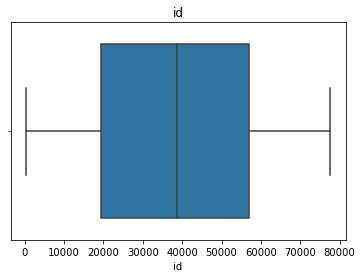

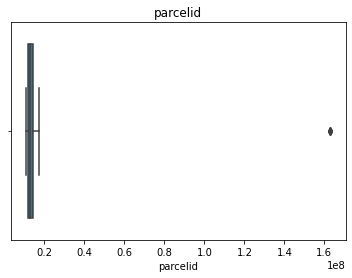

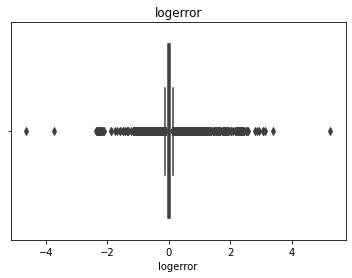

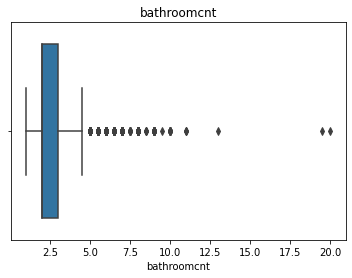

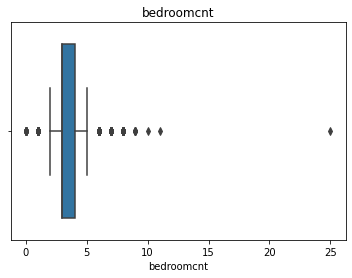

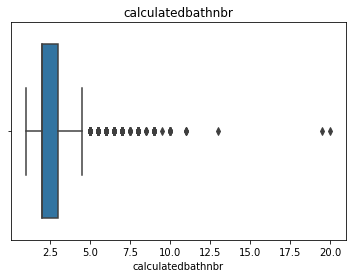

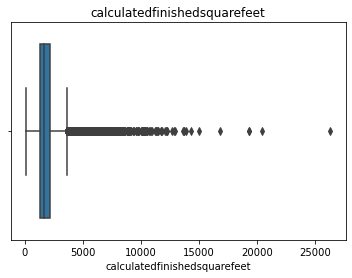

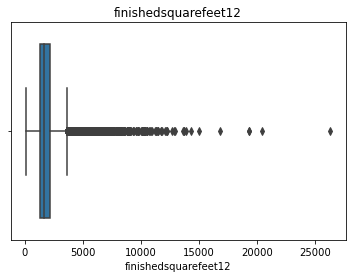

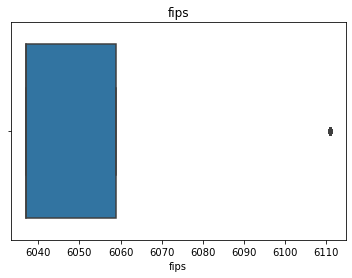

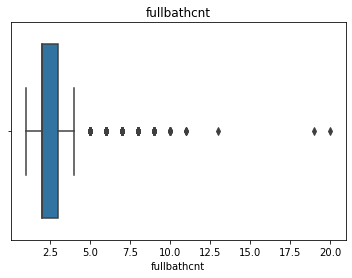

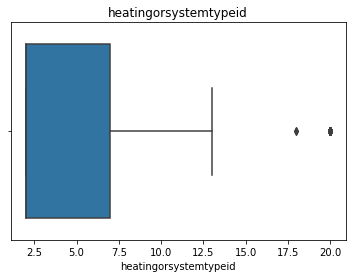

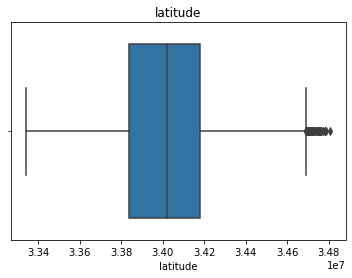

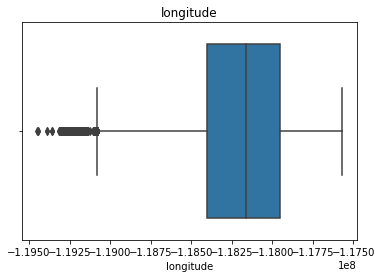

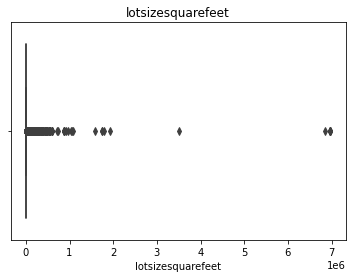

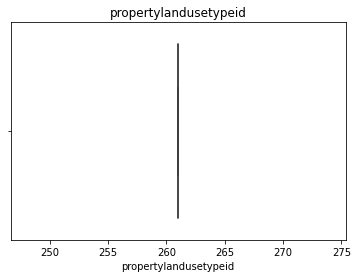

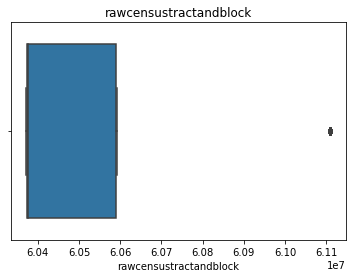

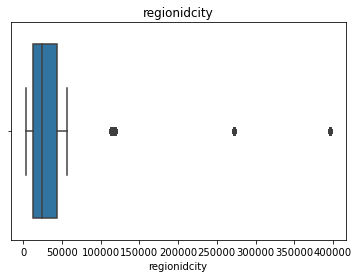

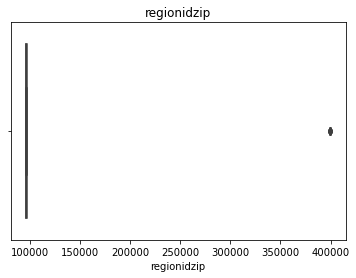

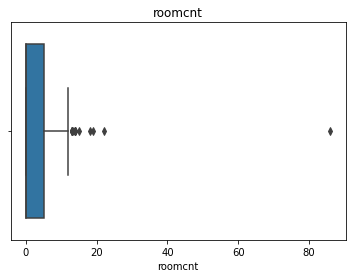

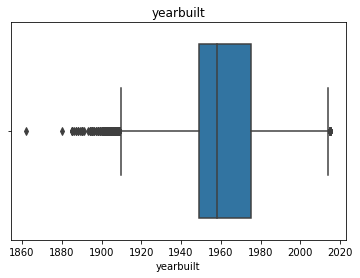

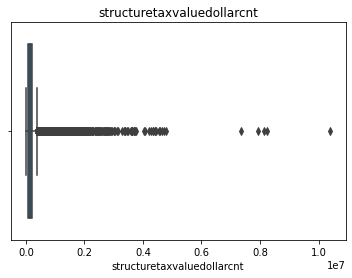

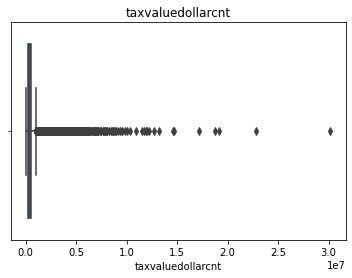

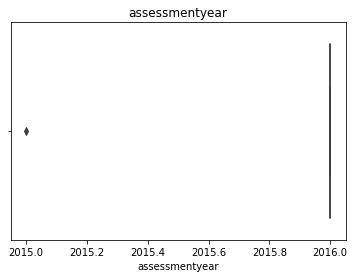

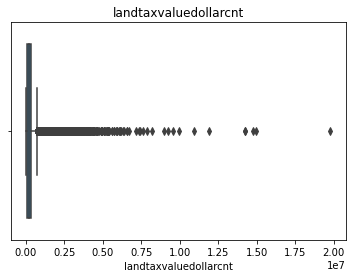

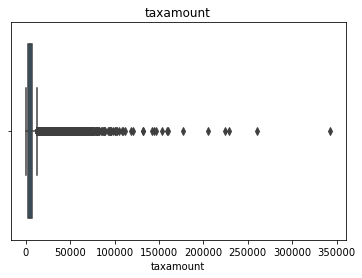

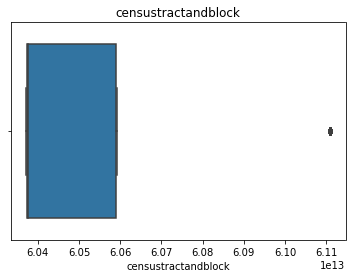

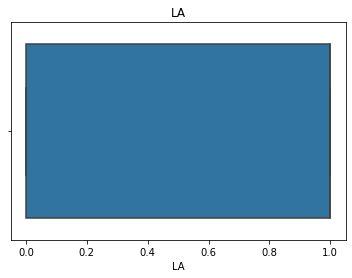

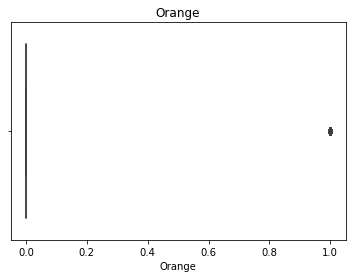

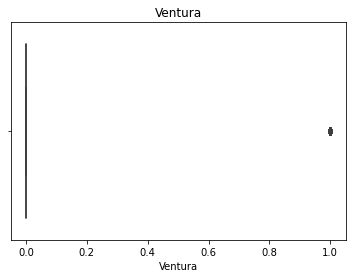

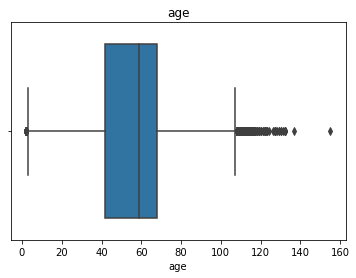

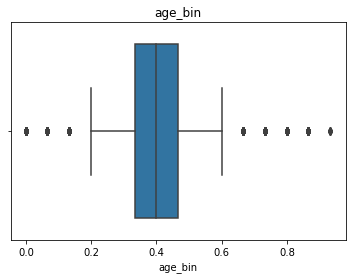

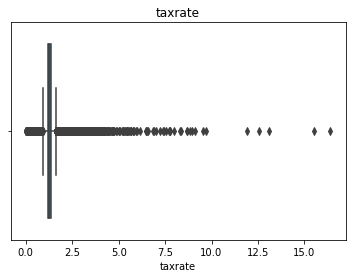

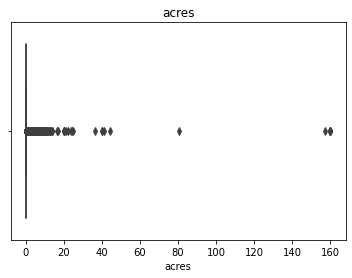

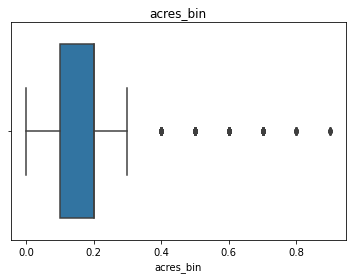

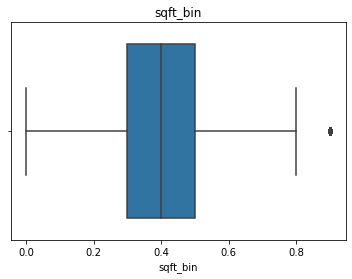

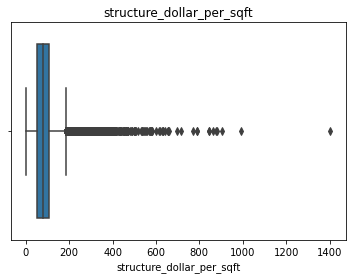

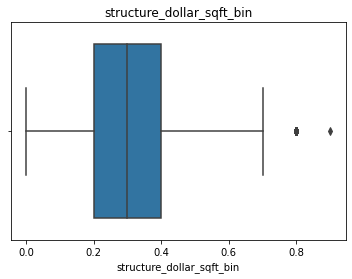

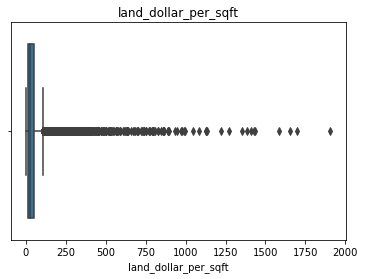

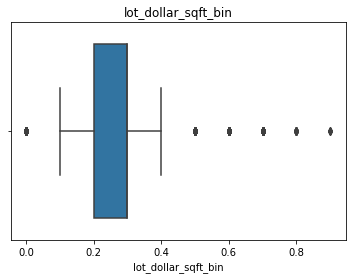

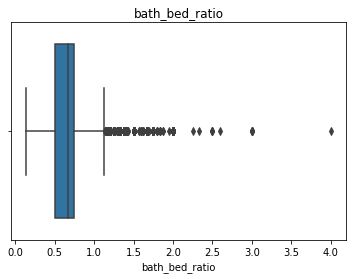

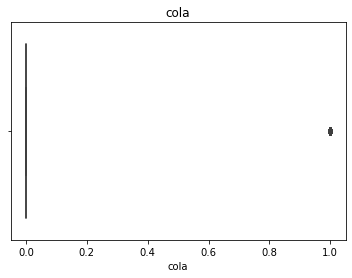

In [40]:
for col in df.columns:
    if df[col].dtypes != 'O':
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()

In [41]:
def remove_outliers():
    '''
    remove outliers in bed, bath, zip, square feet, acres & tax rate
    '''

    return df[((df.bathroomcnt <= 7) & (df.bedroomcnt <= 7) & 
               (df.regionidzip < 100000) & 
               (df.bathroomcnt > 0) & 
               (df.bedroomcnt > 0) & 
               (df.acres < 20) &
               (df.calculatedfinishedsquarefeet < 10000) & 
               (df.taxrate < 10)
              )]

In [43]:
df = remove_outliers()

In [45]:
df.head()

,id,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
52,337,17051828,0.006783,2017-01-03,4.0,4.0,4.0,4969.0,4969.0,6111.0,...,1.101959,2.760009,0.5,0.8,156.915275,0.5,12.050314,0.2,1.000000,0
53,338,17052152,0.054386,2017-01-03,2.0,3.0,2.0,1800.0,1800.0,6111.0,...,1.078220,0.443595,0.3,0.4,177.668333,0.5,24.589194,0.3,0.666667,0
54,339,17052992,0.011061,2017-01-03,1.0,2.0,1.0,780.0,780.0,6111.0,...,1.862213,0.158402,0.2,0.0,90.039744,0.3,2.681159,0.1,0.500000,0
55,340,17053038,0.061977,2017-01-03,2.0,2.0,2.0,1250.0,1250.0,6111.0,...,1.367109,0.094697,0.0,0.2,63.660000,0.2,37.296727,0.3,1.000000,0
56,341,17053061,0.010089,2017-01-03,1.0,2.0,1.0,1404.0,1404.0,6111.0,...,1.270376,0.172176,0.2,0.3,71.120370,0.2,28.532133,0.3,0.500000,0


In [46]:
df_la = df[df.LA == 1].drop(columns = ['parcelid', 'bedroomcnt', 'taxamount', 'taxvaluedollarcnt', 'fips', 
                                       'structure_dollar_per_sqft', 'land_dollar_per_sqft', 'yearbuilt', 
                                       'lotsizesquarefeet', 'regionidcity', 'regionidzip', 
                                       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 
                                       'LA', 'Ventura', 'Orange']) 

In [47]:
df_la.head()

,id,logerror,transactiondate,bathroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,heatingorsystemtypeid,heatingorsystemdesc,...,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_sqft_bin,lot_dollar_sqft_bin,bath_bed_ratio,cola
770,1287,0.012474,2017-01-06,2.0,2.0,1766.0,1766.0,2.0,2.0,Central,...,55.0,0.400,1.260303,0.208563,0.2,0.4,0.2,0.3,0.666667,1
771,1288,0.053889,2017-01-06,3.0,3.0,3085.0,3085.0,3.0,2.0,Central,...,22.0,0.200,1.247400,0.799931,0.4,0.7,0.4,0.2,0.600000,1
772,1289,-0.420413,2017-01-06,3.0,3.0,2401.0,2401.0,3.0,2.0,Central,...,52.0,0.400,1.291606,0.252732,0.3,0.5,0.2,0.2,0.600000,1
773,1290,0.005598,2017-01-06,3.0,3.0,2397.0,2397.0,3.0,2.0,Central,...,33.0,0.266,1.253439,0.296373,0.3,0.5,0.4,0.3,0.750000,1
774,1291,-0.094197,2017-01-06,3.0,3.0,2574.0,2574.0,3.0,2.0,Central,...,36.0,0.266,1.248025,0.231749,0.2,0.6,0.3,0.3,0.750000,1


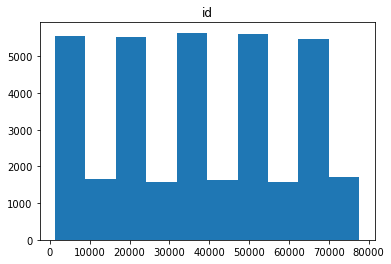

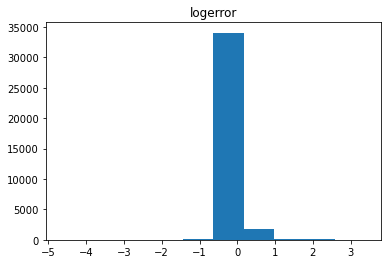

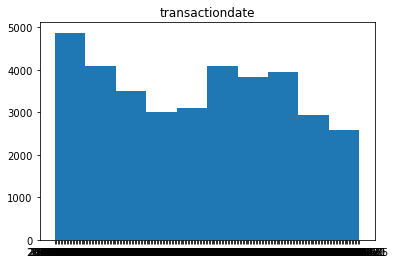

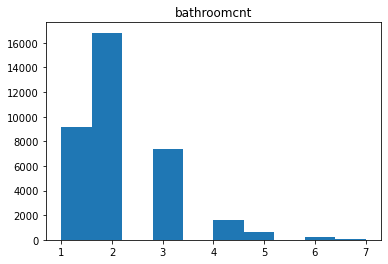

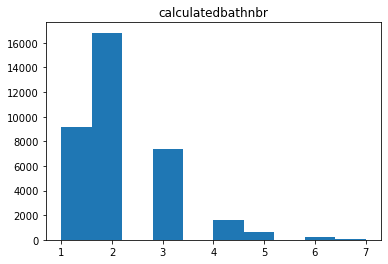

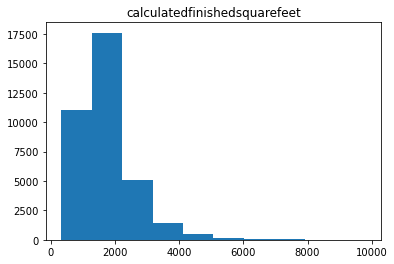

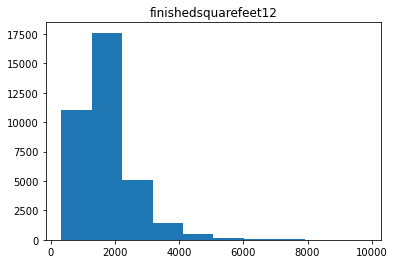

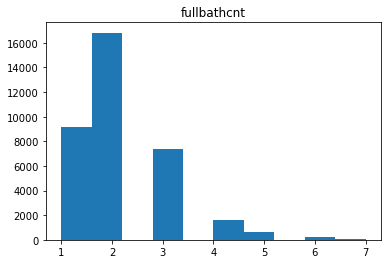

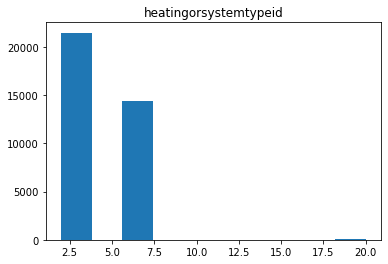

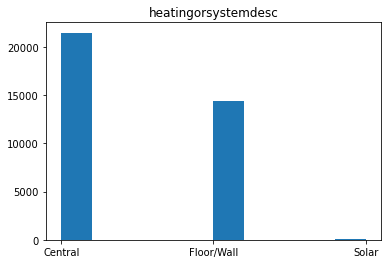

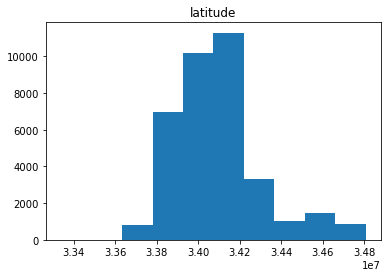

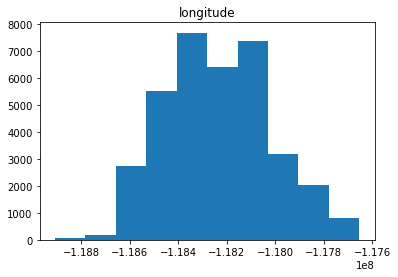

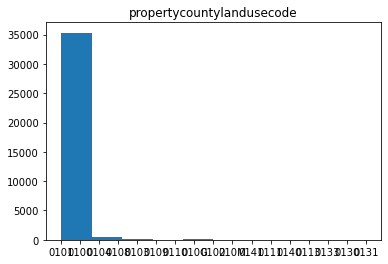

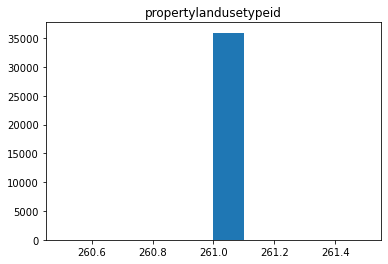

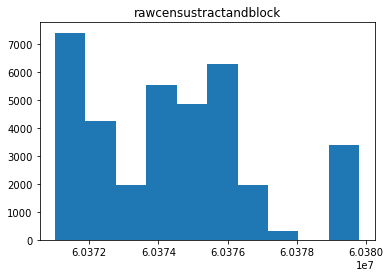

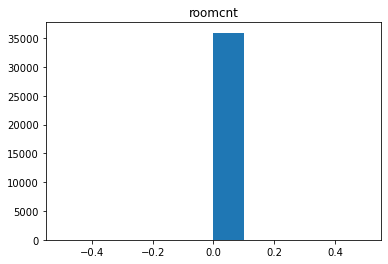

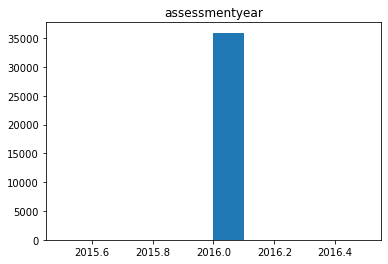

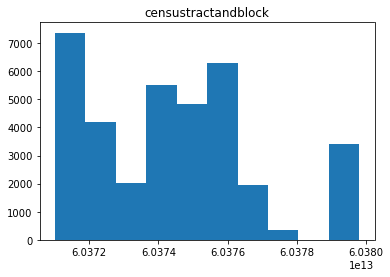

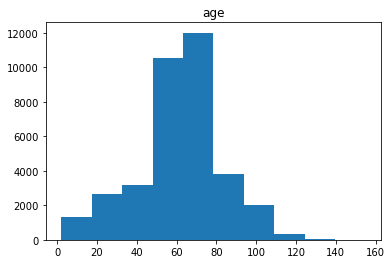

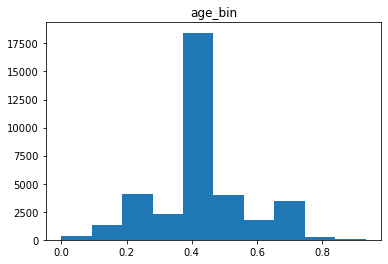

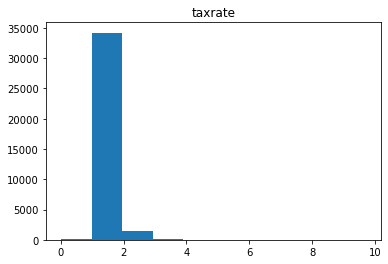

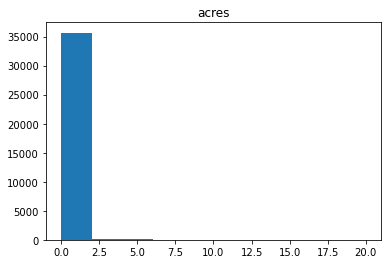

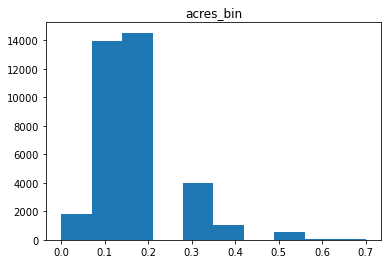

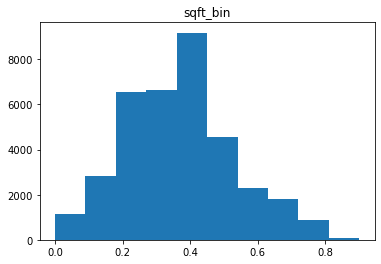

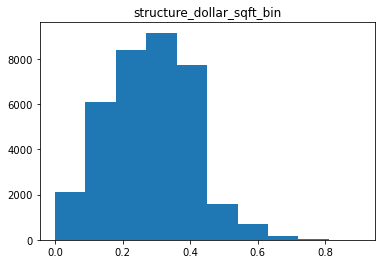

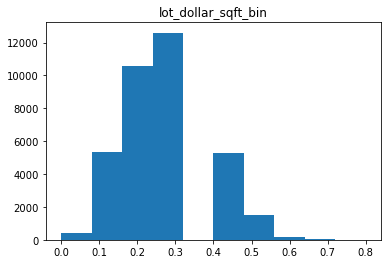

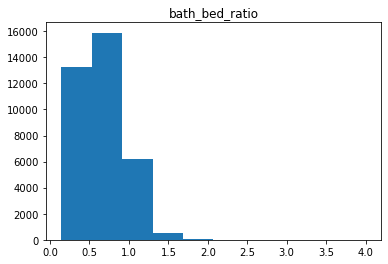

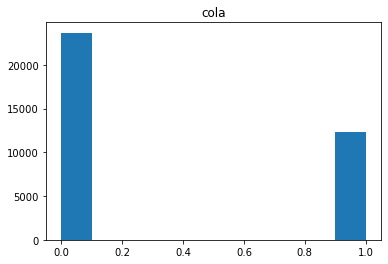

In [48]:
for col in df_la.columns:
    plt.hist(df_la[col])
    plt.title(col)
    plt.show()

In [49]:
def split(df, target_var):
    '''
    This function takes in the dataframe and target variable name as arguments and then
    splits the dataframe into train (56%), validate (24%), & test (20%)
    It will return a list containing the following dataframes: train (for exploration), 
    X_train, X_validate, X_test, y_train, y_validate, y_test
    '''
    # split df into train_validate (80%) and test (20%)
    train_validate, test = train_test_split(df, test_size=.20, random_state=13)
    # split train_validate into train(70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

    # create X_train by dropping the target variable 
    X_train = train.drop(columns=[target_var])
    # create y_train by keeping only the target variable.
    y_train = train[[target_var]]

    # create X_validate by dropping the target variable 
    X_validate = validate.drop(columns=[target_var])
    # create y_validate by keeping only the target variable.
    y_validate = validate[[target_var]]

    # create X_test by dropping the target variable 
    X_test = test.drop(columns=[target_var])
    # create y_test by keeping only the target variable.
    y_test = test[[target_var]]

    partitions = [train, X_train, X_validate, X_test, y_train, y_validate, y_test]
    return partitions

In [50]:
partitions = split(df_la, target_var='logerror')

In [51]:
train = partitions[0]
train['logerror_bins'] = pd.cut(train.logerror, [-5, -.2, -.05, .05, .2, 4])
partitions[0] = train

In [52]:
train.logerror_bins.value_counts()

(-0.05, 0.05]    13145
(0.05, 0.2]       3197
(-0.2, -0.05]     2456
(0.2, 4.0]         853
(-5.0, -0.2]       485
Name: logerror_bins, dtype: int64

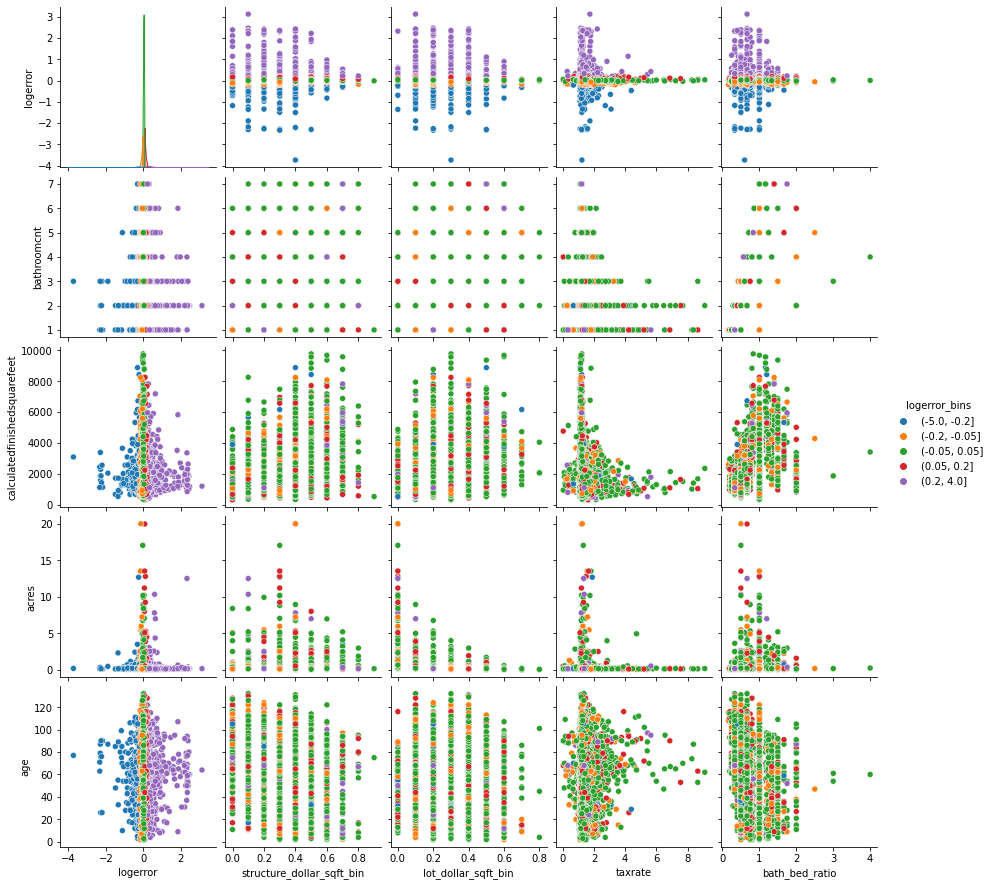

In [53]:
sns.pairplot(data = train, hue = 'logerror_bins', 
             x_vars = ['logerror', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin', 'taxrate', 
                       'bath_bed_ratio'],
             y_vars = ['logerror', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'acres', 'age'])